##Evaluation of Image Quality After Preprocessing: A Metric-Based Analysis Using PSNR, SSIM, MSE, and RMSE

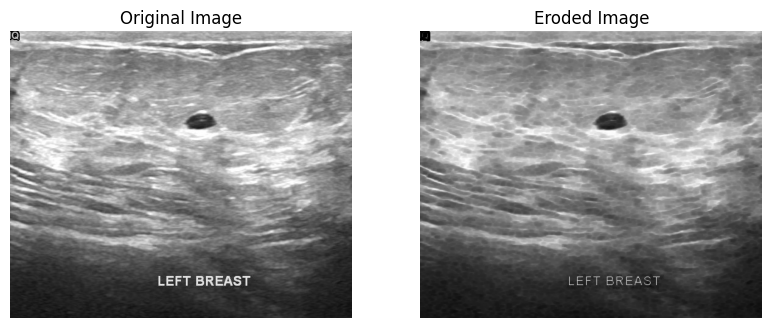

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv.imread('/content/benign (1).png', cv.IMREAD_GRAYSCALE)

# Define the kernel
kernel = np.ones((3,3), np.uint8)

# Perform all morphological operations
erosion = cv.erode(img, kernel, iterations=1)

# Save the eroded image
cv.imwrite('/content/processed1.jpg', erosion)

# Display all the images side by side
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Eroded image
plt.subplot(2, 3, 2)
plt.imshow(erosion, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

# Show the images
plt.show()

In [ ]:
!pip install sewar

  Preparing metadata (setup.py) ... done
  Created wheel for sewar: filename=sewar-0.4.6-py3-none-any.whl size=11418 sha256=1983f304397719b69beca3390b583545dbb23aa9852d70d73e67fcccdb0b4fc7
  Stored in directory: /root/.cache/pip/wheels/87/f9/d9/6ec7e7b470df5ba0e317c6988ba7677a124ab220f5effea702
Successfully built sewar


In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import shutil
from PIL import Image
from PIL import Image,ImageEnhance
from sewar import full_ref
from skimage import metrics
from skimage.metrics import structural_similarity as ssim

In [ ]:
# Load the reference and processed images in color (BGR)
ref_img = cv2.imread("/content/benign (1).png", 1)  # Original image
img = cv2.imread("/content/processed1.jpg", 1)       # Processed image

# Ensure images are the same size
assert ref_img.shape == img.shape, "Images must have the same dimensions!"

# Compute Mean Squared Error (MSE)
mse_skimg = metrics.mean_squared_error(ref_img, img)
print("MSE: based on scikit-image =", mse_skimg / 100)

# Compute Peak Signal-to-Noise Ratio (PSNR)
psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None)
print("PSNR: based on scikit-image =", psnr_skimg)

# Compute Structural Similarity Index (SSIM)
# Get the smallest dimension of the image (height or width)
min_dim = min(ref_img.shape[0], ref_img.shape[1])

# Dynamically set win_size based on min_dim (must be odd and smaller than image dimensions)
if min_dim < 7:
    win_size = min_dim  # Use the smallest dimension if it's less than 7
else:
    win_size = 7  # Default value for larger images

ssim_skimg = ssim(
        ref_img,
        img,
        data_range=img.max() - img.min(),
        multichannel=True,  # Multichannel for color images
        win_size=win_size,  # Dynamically determined
        channel_axis=2,     # Ensure we compute across channels for RGB
    )
print("SSIM: based on scikit-image =", ssim_skimg)

# Compute Root Mean Squared Error (RMSE)
rmse_f = np.sqrt(mse_skimg / 100)
print("RMSE:", rmse_f)

MSE: based on scikit-image = 2.7774215155155613
PSNR: based on scikit-image = 23.69438565391853
SSIM: based on scikit-image = 0.8624161883419781
RMSE: 1.6665597845608664
